## Day 1 Task: Reading hierarchical data files.

This task is to familiarize you with reading and manipulating data from a file. When you obtain satellite data, it will usually come stored in a hierarchical data format, like NetCDF or HDF. These are self-describing data formats that contain not only multiple layers of data, but also the dimensions, attributes, units, and other information that goes with each data field.

In [1]:
#Libraries used

import numpy as np
import h5py

### Reading an HDF file from NASA Earthdata

In [2]:
# We use the File() function to open and create files

viirs = h5py.File('VNP46A2.A2022265.h10v04.001.2022273135614.h5', "r")

Here we provide an example file from the VIIRS instrument to demonstrate the functionality of the h5py library. Later on, you might download data on your own from NASA's EarthData or ESA's Copernicus portals.

### Valid modes of this function are:

'r' - For reading only, the file must exist (it is also the default).

'r+' - For reading and writing, the file must exist.

'w' - Used to create a file or truncate if it exists.

'w'- or 'x' - For creating a file, the command fails if the file already exists.

'a' - For reading and writing if it already exists, creates a file otherwise.

### Getting items in the base directory

An HDF file is hierarchical, the same way that the file system on your computer is. You can think of groups that contain data in an HDF file a little like a folder on your computer contains files.

In [3]:
base_items=list(viirs.items())
print('Items in the base directory:',base_items)


Items in the base directory: [('HDFEOS', <HDF5 group "/HDFEOS" (2 members)>), ('HDFEOS INFORMATION', <HDF5 group "/HDFEOS INFORMATION" (1 members)>)]


### Getting items from the subgroups

Just like your filesystem, we can traverse the file to look at different parts of it. From the output of the previous command, we see two top-level items name "HDFEOS" and "HDFEOS INFORMATION". Let's have a closer look at one of these.

In [4]:
#reading subgroups 
#here we are getting items from the 'HDFEOS' group
g1=viirs.get('HDFEOS')
g1_items=list(g1.items())
print('Items in HDFEOS',g1_items)

#Similarly we can get items of the 'HDFEOS INFORMATION' group

Items in HDFEOS [('ADDITIONAL', <HDF5 group "/HDFEOS/ADDITIONAL" (1 members)>), ('GRIDS', <HDF5 group "/HDFEOS/GRIDS" (1 members)>)]


In [5]:
#Opening a subgroup

g2=g1.get('ADDITIONAL') #g1 has got the group HDFEOS and from g1 we can derive the subgroups of HDFEOS
g2_items=list(g2.items())
print('Items in subgroup ADDITIONAL',g2_items)

Items in subgroup ADDITIONAL [('FILE_ATTRIBUTES', <HDF5 group "/HDFEOS/ADDITIONAL/FILE_ATTRIBUTES" (0 members)>)]


In [6]:
#We can also open the subgroups using a full location path
g3=viirs.get('/HDFEOS/GRIDS/VNP_Grid_DNB/Data Fields')
g3_items=list(g3.items())
print('Items in VNP_Grid_DNB',g3_items)

Items in VNP_Grid_DNB [('DNB_BRDF-Corrected_NTL', <HDF5 dataset "DNB_BRDF-Corrected_NTL": shape (2400, 2400), type "<u2">), ('DNB_Lunar_Irradiance', <HDF5 dataset "DNB_Lunar_Irradiance": shape (2400, 2400), type "<u2">), ('Gap_Filled_DNB_BRDF-Corrected_NTL', <HDF5 dataset "Gap_Filled_DNB_BRDF-Corrected_NTL": shape (2400, 2400), type "<u2">), ('Latest_High_Quality_Retrieval', <HDF5 dataset "Latest_High_Quality_Retrieval": shape (2400, 2400), type "|u1">), ('Mandatory_Quality_Flag', <HDF5 dataset "Mandatory_Quality_Flag": shape (2400, 2400), type "|u1">), ('QF_Cloud_Mask', <HDF5 dataset "QF_Cloud_Mask": shape (2400, 2400), type "<u2">), ('Snow_Flag', <HDF5 dataset "Snow_Flag": shape (2400, 2400), type "|u1">)]


### Opening a dataset

In the last output, instead of "HDF5 group", you start to see "HDF5 dataset". To work with the actual datasets in the file, we can use the objects captured in our last get command to print out the names of all these datasets. Then we can convert the dataset directly into a numpy array and treat it as an array in our code.

In [7]:
#Getting a list of all the datasets that are available in the path /HDFEOS/GRIDS/VNP_Grid_DNB/Data Fields

ls=list(g3.keys())
print('List of datasets in Data Fields: \n',ls)


List of datasets in Data Fields: 
 ['DNB_BRDF-Corrected_NTL', 'DNB_Lunar_Irradiance', 'Gap_Filled_DNB_BRDF-Corrected_NTL', 'Latest_High_Quality_Retrieval', 'Mandatory_Quality_Flag', 'QF_Cloud_Mask', 'Snow_Flag']


In [8]:
#Here we are opening the dataset and converting it into a numpy array
#Once it is in numpy array format you can perform array functions on it

datavalues1=np.array(g3.get('DNB_BRDF-Corrected_NTL'))
print('Shape of datavalues1: \n', datavalues1.shape)
print(datavalues1)

Shape of datavalues1: 
 (2400, 2400)
[[65535 65535 65535 ...     3     3     3]
 [65535 65535 65535 ...     4     3     3]
 [65535 65535 65535 ...     3     3     3]
 ...
 [65535 65535 65535 ... 65535 65535 65535]
 [65535 65535 65535 ... 65535 65535 65535]
 [   17 65535 65535 ... 65535 65535 65535]]


### Read attributes of the dataset

Remember that each data field also comes with all the information that describes it (HDF is a self-describing file format). Each dataset is created with a set of attributes that tell you things like what the units of the data are, or how a "fill" value is represented.

In [9]:
dataset1=g3.get('DNB_BRDF-Corrected_NTL')
k=list(dataset1.attrs.keys()) #list of keys
v=list(dataset1.attrs.values()) #list of values
print(k[:]) 
print(v[:])


#first value should correspond to the first key

print(dataset1.attrs[k[0]]) #here we are printing the value which corresponds to the first key

print(k[4],v[4])

['_FillValue', 'long_name', 'offset', 'scale_factor', 'units', 'valid_range']
[array([65535], dtype=uint16), b'BRDF Corrected DNB Radiance', array([0.]), array([0.1]), b'nWatts/(cm^2 sr) \n', b'0-65534 \n']
[65535]
units b'nWatts/(cm^2 sr) \n'


## Try it yourself!

#### 1. Open the example .h5 file, or download your own from search.earthdata.nasa.gov

    The example file is from the dataset called "VIIRS/NPP Gap-Filled Lunar BRDF-Adjusted Nighttime Lights Daily L3 Global 500m Linear Lat Lon Grid"

#### 2. Read the items in the base directory items into a list and print the list

    Can you list all of the datasets in the file using a recursive function call?

#### 3. Read in the data attributes to find the units and scale factor for the "DNB_Lunar_Irradiance" data

    Can you determine the latitude and longitude range of the data in this file?

#### 4. Read in data values to a numpy array and perform a calculation

    What is the average value of the "Gap_Filled_DNB_BRDF-Corrected_NTL" data for this scene? Don't forget to remove the fill values!

    Often we use one data field as a way to filter another, especially for things like cloud contamination. If you screen out all of the "Gap_Filled_DNB_BRDF-Corrected_NTL" data where the "QF_Cloud_Mask" is higher than 200, what is the average value now?

#### 5. Try plotting the data values from "Latest_High_Quality_Retrieval" using the plot_surface() function of pyplot

    You might need to create a grid using the latitude and longitude range and the number of points in your array.

    What geographical features do you recognize in the data?




['AlgorithmType', 'DataResolution', 'DayNightFlag', 'EastBoundingCoord', 'EndTime', 'GRingPointLatitude', 'GRingPointLongitude', 'GranuleDayNightFlag', 'HorizontalTileNumber', 'InputPointer', 'LSIPS_AlgorithmVersion', 'LocalGranuleID', 'LongName', 'NorthBoundingCoord', 'PGENumber', 'PGEVersion', 'PGE_EndTime', 'PGE_Name', 'PGE_StartTime', 'PlatformShortName', 'ProcessingCenter', 'ProcessingEnvironment', 'ProductionTime', 'RangeBeginningDate', 'RangeBeginningTime', 'RangeEndingDate', 'RangeEndingTime', 'SatelliteInstrument', 'SensorShortname', 'ShortName', 'SouthBoundingCoord', 'StartTime', 'TileID', 'VersionID', 'VerticalTileNumber', 'WestBoundingCoord', 'identifier_product_doi', 'identifier_product_doi_authority']
EastBoundingCoord -70.0
NorthBoundingCoord 50.0
SouthBoundingCoord 40.0
WestBoundingCoord -80.0
4101.217008159722
['_FillValue', 'long_name', 'offset', 'scale_factor', 'units', 'valid_range']
[65535]
13.676037923491986
14.376703035517854
2400
10.0
0.004166666666666667
[40.  

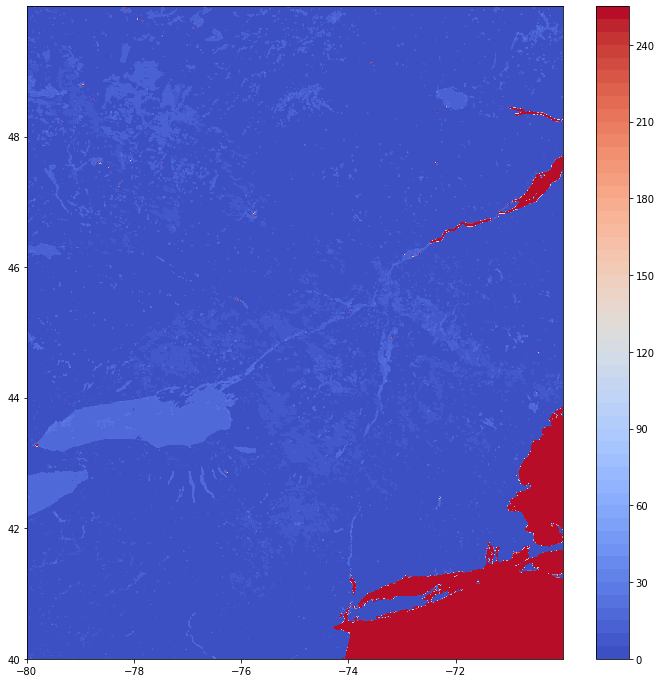

In [59]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

viirs = h5py.File('VNP46A2.A2022265.h10v04.001.2022273135614.h5', "r")
baseattrkey = list(viirs.attrs.keys())
baseattrval = list(viirs.attrs.values())
print(baseattrkey)
print(baseattrkey[3],baseattrval[3])
print(baseattrkey[13],baseattrval[13])
print(baseattrkey[30],baseattrval[30])
print(baseattrkey[35],baseattrval[35])

datavalues3 = np.array(g3.get('Gap_Filled_DNB_BRDF-Corrected_NTL'))
print(datavalues3.mean())
set3attrkey = list(g3.get('Gap_Filled_DNB_BRDF-Corrected_NTL').attrs.keys())
print(set3attrkey)
set3attrval = list(g3.get('Gap_Filled_DNB_BRDF-Corrected_NTL').attrs.values())
print(set3attrval[0])

print(datavalues3[datavalues3 != 65535].mean())

datavalues4 = np.array(g3.get('QF_Cloud_Mask'))
print(datavalues3[datavalues4 <= 200].mean())

print(datavalues3.shape[0])
lat1 = np.float32(baseattrval[13])
lat2 = np.float32(baseattrval[30])
latrange = lat1 - lat2
print(latrange)
latstep = latrange / datavalues3.shape[0]
print(latstep)
datalat = np.arange(lat2,lat1,latstep)
print(datalat)
print(datalat.shape)

lon1 = np.float32(baseattrval[3])
lon2 = np.float32(baseattrval[35])
lonrange = lon1 - lon2
lonstep = lonrange / datavalues3.shape[0]
datalon = np.arange(lon2,lon1,lonstep)

pllat, pllon = np.meshgrid(datalat, datalon)
print(pllat.shape)
datavalues5 = np.array(g3.get('Latest_High_Quality_Retrieval'))

fig = plt.figure(figsize=(12,12))
# this works for using plot_surface, but the contourf function is easier and accomplishes our goal of viewing the data
#ax = plt.axes(projection='3d')
#surf = ax.plot_surface(pllon,pllat,datavalues5,cmap=cm.coolwarm,edgecolor='none')
#ax.view_init(90, 0)
#fig.colorbar(surf)
#plt.show()

ax = plt.axes()
# the transpose and flip are needed because we are plotting on an x/y axis instead of a lat/lon map
surf = ax.contourf(pllon,pllat,np.transpose(np.flipud(datavalues5)),50,cmap=cm.coolwarm)
fig.colorbar(surf)
plt.show()